# 3. Machine learning

### Dataset: HDB resale prices since 2017

This notebook contains the models we have used for our problem, including a price prediction function that takes in inputs and generates price predictions

Summary:
1. Multivariate linear regression
2. Random forest regression
3. K-Nearest Neighbours (KNN)

In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
np.random.seed(42)

In [2]:
alldf = pd.read_csv("/work/alldf.csv")

alldf.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaininglease,address,latitude,longitude,storey_midpoint,numerical_month,Distance_from_Centre (km),distance_to_nearest_mrt,distance_to_nearest_mall,numeric_room_type,geometry
0,2017-01-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,1970-01-01 00:00:00.000001979,232000.0,61.33,406 ANG MO KIO AVE 10,1.362005,103.853880,11.0,1,8.237451,940.433589,1024.343762,2,POINT (103.8538799 1.362004539)
1,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1970-01-01 00:00:00.000001978,250000.0,60.58,108 ANG MO KIO AVE 4,1.370966,103.838202,2.0,1,9.353331,201.370349,864.215691,3,POINT (103.8382019 1.370966352)
2,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1970-01-01 00:00:00.000001980,262000.0,62.42,602 ANG MO KIO AVE 5,1.380709,103.835368,2.0,1,10.474170,491.898968,1558.616517,3,POINT (103.8353682 1.38070883)
3,2017-01-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,1970-01-01 00:00:00.000001980,265000.0,62.08,465 ANG MO KIO AVE 10,1.366201,103.857201,5.0,1,8.721599,894.428774,898.970693,3,POINT (103.857201 1.366201041)
4,2017-01-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1970-01-01 00:00:00.000001980,265000.0,62.42,601 ANG MO KIO AVE 5,1.381041,103.835132,2.0,1,10.515178,462.994532,1603.405761,3,POINT (103.8351317 1.381041355)


## 1. Multivariate linear regression

Involves multiple predictors (floor_area_sqm, remaining lease etc) to predict the response variable, which is the resale price. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172055 entries, 0 to 172054
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   month                      172055 non-null  object 
 1   town                       172055 non-null  object 
 2   flat_type                  172055 non-null  object 
 3   storey_range               172055 non-null  object 
 4   floor_area_sqm             172055 non-null  float64
 5   flat_model                 172055 non-null  object 
 6   lease_commence_date        172055 non-null  object 
 7   resale_price               172055 non-null  float64
 8   remaininglease             172055 non-null  float64
 9   address                    172055 non-null  object 
 10  latitude                   172055 non-null  float64
 11  longitude                  172055 non-null  float64
 12  storey_midpoint            172055 non-null  float64
 13  numerical_month            17

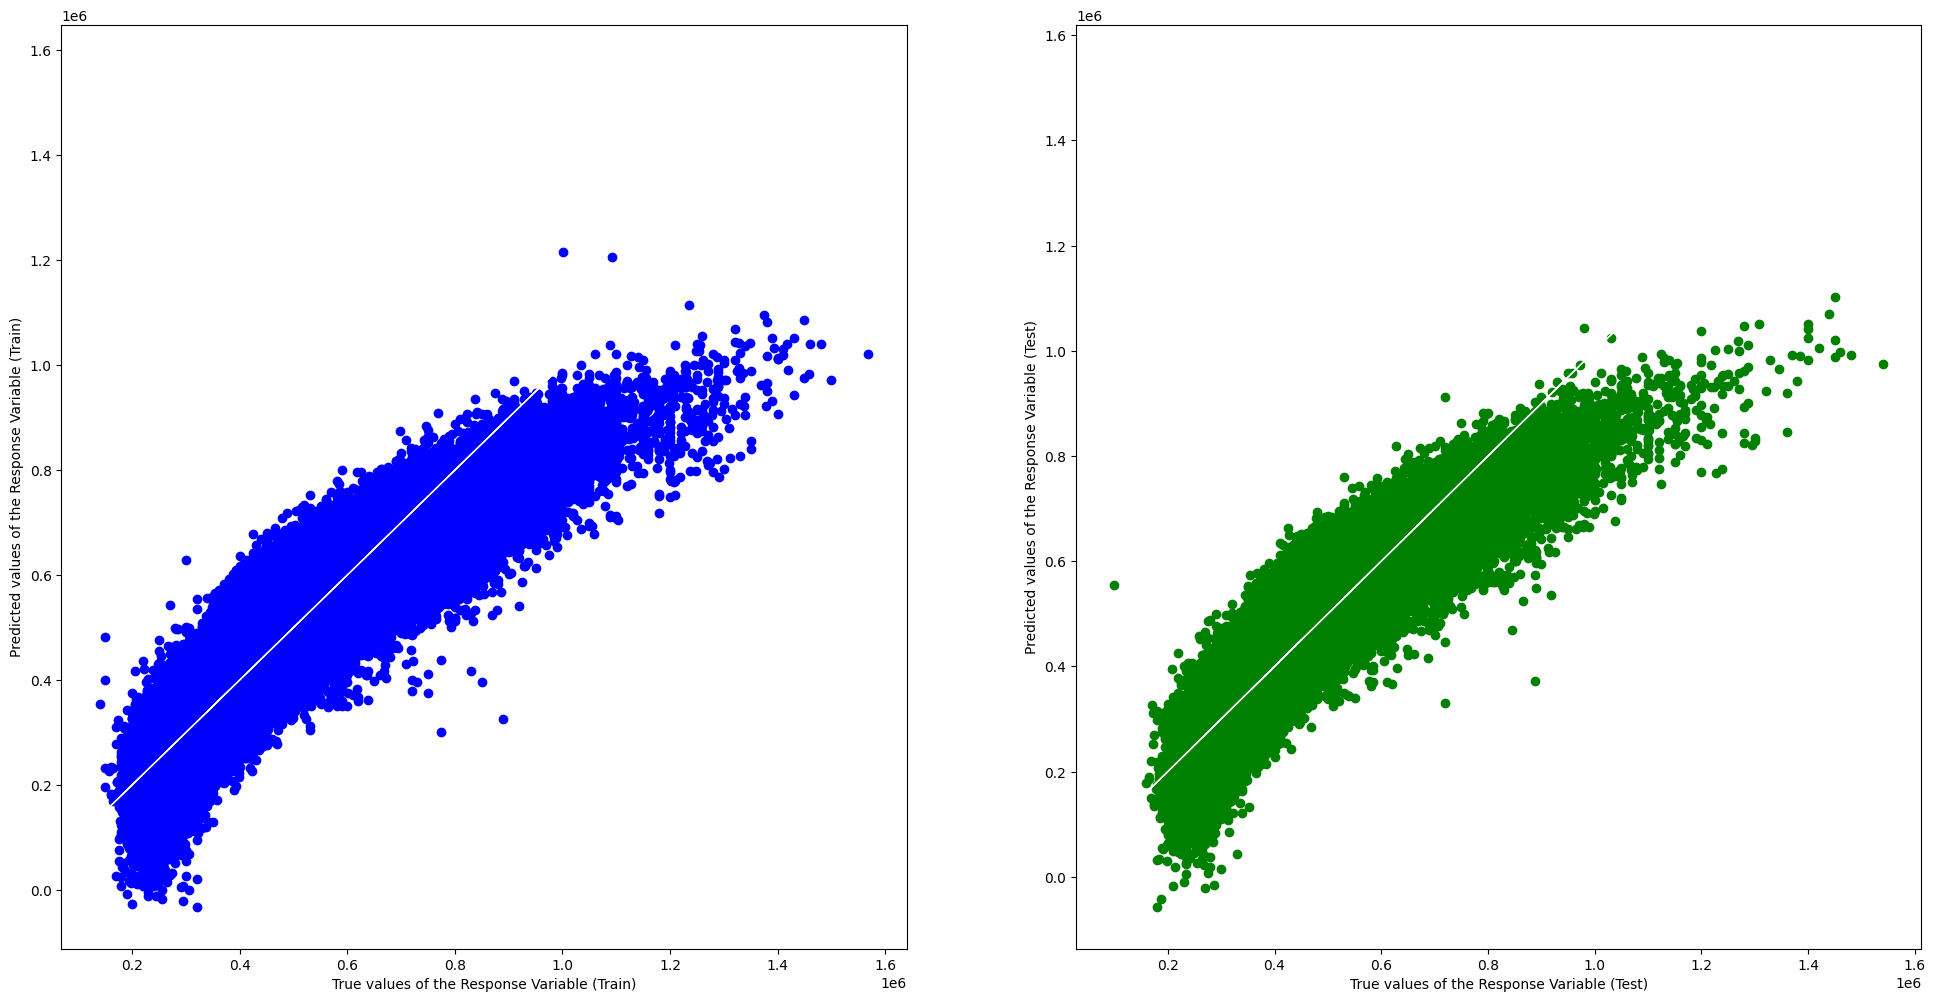

In [4]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import math#import new_df
distance_df = pd.read_csv("alldf.csv") #need change
distance_df.info()

# Extract Response and Predictors
y = pd.DataFrame(distance_df["resale_price"])
X = pd.DataFrame(distance_df[['floor_area_sqm', 'remaininglease', 'latitude', 'longitude','storey_midpoint','numerical_month','Distance_from_Centre (km)','distance_to_nearest_mrt','distance_to_nearest_mall','numeric_room_type']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()



# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## 2. Random Forest regression

In [5]:
distance_df['distance_from_centre_km']= distance_df['Distance_from_Centre (km)']

Explained Variance (R^2) 	: 0.9736618928030015
Mean Squared Error (MSE) 	: 766385221.5424925
Feature importances: {'floor_area_sqm': 0.4197271090658312, 'remaininglease': 0.09539718130159401, 'latitude': 0.01893300288016252, 'longitude': 0.029335260556185457, 'storey_midpoint': 0.023497250979401616, 'numerical_month': 0.11824281973829208, 'distance_from_centre_km': 0.2294327824827938, 'distance_to_nearest_mrt': 0.013986260144432945, 'distance_to_nearest_mall': 0.014074096662338047, 'numeric_room_type': 0.037374236188968436}


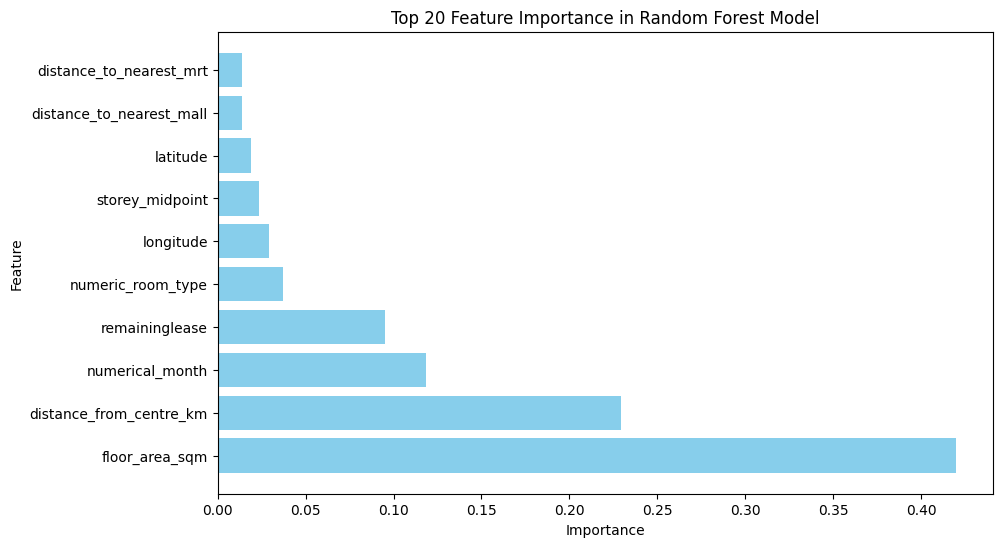

In [6]:

features = distance_df[['floor_area_sqm', 'remaininglease', 'latitude', 'longitude','storey_midpoint','numerical_month','distance_from_centre_km','distance_to_nearest_mrt','distance_to_nearest_mall','numeric_room_type']]
target = distance_df['resale_price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = rf_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r_squared = rf_model.score(X_test, y_test)  # Using model's score method

print("Explained Variance (R^2) \t:", r_squared)
print("Mean Squared Error (MSE) \t:", mse)


# Feature importance
importances = rf_model.feature_importances_
feature_names = features.columns
importance_dict = dict(zip(feature_names, importances))
print("Feature importances:", importance_dict)

# Sort the importance dictionary by values in descending order
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))

# Extract sorted feature names and importances
sorted_feature_names = list(sorted_importance_dict.keys())
sorted_importances = list(sorted_importance_dict.values())

top20_feature_names = sorted_feature_names[:20]
top20_importances = sorted_importances[:20]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top20_feature_names, top20_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance in Random Forest Model')
plt.show()

In [8]:
!pip install geopy==2.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 KB 11.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [19]:
from geopy.geocoders import Nominatim
import math
from scipy.spatial import cKDTree

# Function to convert latitude and longitude to approximate meters
def latlon_to_meters(lat,lon):
    lat_m = lat * 110574  # Approximate length of a degree of latitude in meters
    lon_m = lon * 111320 * np.cos(np.radians(lat))  # Approximate length of a degree of longitude in meters
    return lat_m, lon_m

# Load data

mrt_stations = pd.read_csv('MRT Stations.csv')
mall = pd.read_csv('/work/shopping_mall_coordinates.csv')


def haversine(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula 
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371 
    return c * r

 #city centre The latitude of Downtown Core, Singapore is 1.287953, and the longitude is 103.851784. Downtown Core, Singapore is located at Singapore country in the Districts place category with the gps coordinates of 1° 17' 16.6308'' N and 103° 51' 6.4224'' E.
lat1 = 1.287953
lon1 = 103.851784

def predict_resale_price(model, floor_area_sqm, remaininglease, latitude, longitude, storey_midpoint, numerical_month, distance_from_centre_km, distance_to_nearest_mrt, distance_to_nearest_mall,
        numeric_room_type):
    # Create a DataFrame with the provided features
    features = pd.DataFrame({
        'floor_area_sqm': [floor_area_sqm],
        'remaininglease': [remaininglease],
        'latitude': [latitude],
        'longitude': [longitude],
        'storey_midpoint': [storey_midpoint],
        'numerical_month': [numerical_month],
        'distance_from_centre_km': [distance_from_centre_km],
        'distance_to_nearest_mrt': [distance_to_nearest_mrt],
        'distance_to_nearest_mall': [distance_to_nearest_mall],
        'numeric_room_type': [numeric_room_type]
    })
    return model.predict(features)[0]


def geocode_postal_code(postal_code):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(postal_code + ", Singapore")
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Example usage



def main(model):
    print("Please enter the property details.")
    ##input postal code, which converts into lat and long
    postal_code = input("Please input the postal code: ")
    print("Postal code:", postal_code)
    latitude, longitude = geocode_postal_code(postal_code)
    if latitude is not None and longitude is not None:
        print("Latitude:", latitude)
        print("Longitude:", longitude)
    else:
        print("Postal code not found or invalid.")
    # calculate distances with haversine and lat and long
    distance_from_centre_km = haversine(lat1, lon1, latitude, longitude)
    # calculate distances to nearest mrt and mall
    # Prepare coordinates for KD-Tree in meter approximation
    filtered_coords = latlon_to_meters(latitude, longitude)
    mrt_coords = np.array([latlon_to_meters(lat, lon) for lat, lon in zip(mrt_stations['Latitude'], mrt_stations['Longitude'])])
    mall_coords = np.array([latlon_to_meters(lat, lon) for lat, lon in zip(mall['LATITUDE'], mall['LONGITUDE'])])

    # Create KD-Tree for MRT stations
    mrt_tree = cKDTree(mrt_coords)
    mall_tree = cKDTree(mall_coords)

    # Query KD-Tree for nearest MRT station distance for each property
    distances_mrt, _ = mrt_tree.query(filtered_coords, k=1)  # distances are in meters
    distances_mall, _ = mall_tree.query(filtered_coords, k=1)  # distances are in meters


    # Assign calculated distances to the DataFrame
   
    distance_to_nearest_mrt = distances_mrt
    distance_to_nearest_mall = distances_mall
    print(f"distance to nearest mrt is {distance_to_nearest_mrt}")
    print(f"distance to nearest mall is {distance_to_nearest_mall}")
    
    floor_area_sqm = float(input("Floor area (in sqm): "))
    print(f"Floor area sqm: {floor_area_sqm}")
    remaininglease = int(input("Remaining lease (in years): "))
    print(f"Remaining lease: {remaininglease}")
    storey_midpoint = int(input("Storey midpoint: "))
    print(f"Storey midpoint: {storey_midpoint}")
    year = int(input("Input year you wish to buy in: "))
    print(f"Year: {year}")
    month = int(input("Input month you wish to buy in: "))
    print(f"Month: {month}")
    numerical_month = 12*(year - 2017) + month
    print("Please input the corresponding number that matches to the flat type you are looking for.\n1: 1 Room\n2: 2 Room\n3: 3 Room\n4: 4 Room\n5: 5 Room\n6: Executive\n7: Multi-gen")
    numeric_room_type = int(input("Numeric room type: "))
    

    predicted_price = predict_resale_price(
    model,
    floor_area_sqm,
    remaininglease,
    latitude,
    longitude,
    storey_midpoint,
    numerical_month,
    distance_from_centre_km,
    distance_to_nearest_mrt,
    distance_to_nearest_mall,
    numeric_room_type,
    
    )
    
    print(f"The predicted resale price is: ${predicted_price:.2f}")

main(rf_model)



Please enter the property details.
Postal code: 380044
Latitude: 1.3163506
Longitude: 103.8773419
distance to nearest mrt is 618.9232856757742
distance to nearest mall is 1522.8483003483946
Floor area sqm: 88.0
Remaining lease: 50
Storey midpoint: 14
Year: 2024
Month: 3
Please input the corresponding number that matches to the flat type you are looking for.
1: 1 Room
2: 2 Room
3: 3 Room
4: 4 Room
5: 5 Room
6: Executive
7: Multi-gen
The predicted resale price is: $485062.76


## 3. KNN

In [10]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [11]:
#X = alldf[['floor_area_sqm', 'remaininglease', 'latitude', 'longitude','storey_midpoint','numerical_month','numeric_room_type','Distance_from_Centre (km)','distance_to_nearest_mrt','distance_to_nearest_mall']]

X = alldf[['floor_area_sqm', 'remaininglease', 'latitude', 'longitude','storey_midpoint','numerical_month','Distance_from_Centre (km)','distance_to_nearest_mrt','distance_to_nearest_mall','numeric_room_type']]
y = alldf['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

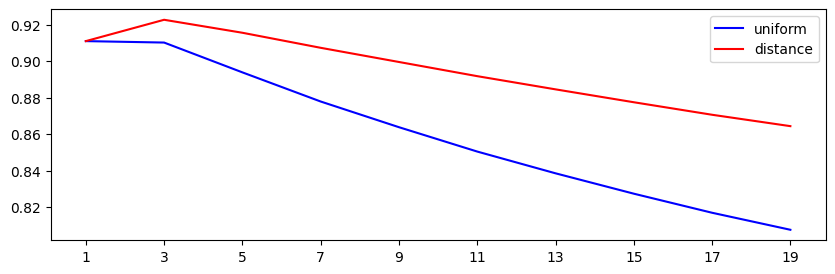

In [15]:
uniform  = []
distance = []
r = range (1,21,2)

for k in r:
    
    # Euclidan, 'straight' distance
    model = KNeighborsRegressor(n_neighbors = k, weights='uniform')
    model.fit(X_train.values, y_train.values)
    uniform.append(model.score(X_test.values,y_test.values))

    # Distance is inversely proportional (to lessen the weight of outliers)
    model = KNeighborsRegressor(n_neighbors = k, weights='distance') 
    model.fit(X_train.values, y_train.values)
    distance.append(model.score(X_test.values,y_test.values))

uniform = np.array(uniform)
distance = np.array(distance)

plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(r,uniform,label='uniform',color='blue')
plt.plot(r,distance,label='distance',color='red')
plt.legend()
plt.gca().set_xticks(r)
plt.show()


In [16]:
pd.DataFrame({"k" : r, "uniform" : uniform, "distance" : distance})

,k,uniform,distance
0,1,0.910975,0.910975
1,3,0.910184,0.922664
2,5,0.893852,0.915554
3,7,0.877885,0.907308
4,9,0.863813,0.899541
5,11,0.850466,0.891776
6,13,0.838550,0.884548
7,15,0.827390,0.877485
8,17,0.816939,0.870626
9,19,0.807614,0.864388


In [17]:
params = {'n_neighbors':range(1,21,2),'weights':['uniform','distance']}
model = GridSearchCV(KNeighborsRegressor(), params, cv=7)
model.fit(X_train.values,y_train.values)
model.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [18]:
mse = mean_squared_error(y_test, y_test_pred)
r_squared = model.score(X_test.values, y_test.values)  # Using model's score method

print("Explained Variance (R^2) \t:", r_squared)
print("Mean Squared Error (MSE) \t:", mse)


Explained Variance (R^2) 	: 0.9226643141708415
Mean Squared Error (MSE) 	: 53403248469.737236


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d45d76c1-fda9-4cb4-b314-47c76fd050a8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>